In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-01-22 23:49:30.560814: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df1=pd.read_csv("ttrain.csv")

In [3]:
df2=pd.read_csv("ttest.csv")


In [4]:
df=pd.concat([df1,df2],ignore_index=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
df.shape

(1309, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df["Title"]=df["Name"].str.extract("([A-Za-z]+)\.",expand=False)
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Dr','Major','Col','Capt','Sir','Rev','Jonkheer','Don'],'Mr')

<AxesSubplot:xlabel='Title', ylabel='count'>

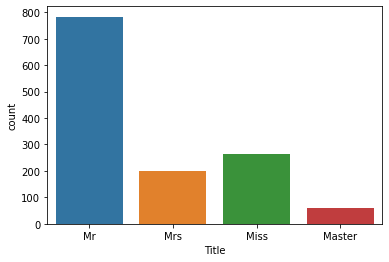

In [13]:
df['Title'].value_counts()
sns.countplot(df["Title"])

In [14]:
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)

In [15]:
del df["Cabin"]

In [16]:
df["Fare"].fillna(df["Fare"].median(),inplace=True)

In [17]:
df['Family']=df['SibSp']+df['Parch']+1

<AxesSubplot:xlabel='Embarked', ylabel='count'>

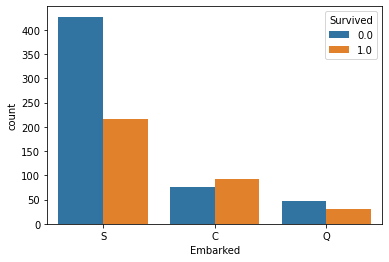

In [18]:
sns.countplot(df["Embarked"],hue=df["Survived"])

In [19]:
df["Embarked"]=df["Embarked"].fillna("S")

In [20]:
df.drop(['Ticket'],axis=1,inplace=True)

In [21]:
df.drop("Name",axis=1,inplace=True)

In [22]:
df=pd.get_dummies(df,drop_first=True)

In [23]:
x,y=df[:891].drop("Survived",axis=1),df[:891][["Survived"]]

In [24]:
x.shape,y.shape

((891, 13), (891, 1))

In [25]:
def result_func(model,count):
    predict_x=model.predict(df[891:].drop("Survived",axis=1))
    result_dataset=pd.DataFrame()
    result_dataset["PassengerId"]=df[891:]["PassengerId"]
    result_dataset["Predict"]=predict_x
    result_dataset["Survived"]=result_dataset["Predict"].map(lambda s:1 if s>=0.5 else 0 )
    print(result_dataset["Survived"].value_counts().plot.bar())
    result_dataset.drop("Predict",axis=1).to_csv("titanic_deep_learning_result_model{}.csv".format(count),index=False)
    return result_dataset 

In [26]:
model=Sequential()
model.add(Dense(13,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

2023-01-23 00:24:31.872843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [28]:
model.fit(x,y,epochs=200,batch_size=10,verbose=1)

Epoch 1/200
90/90 [==============================] - 2s 3ms/step - loss: 20.1634 - accuracy: 0.3838
Epoch 2/200
90/90 [==============================] - 0s 2ms/step - loss: 0.9611 - accuracy: 0.5623
Epoch 3/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6364
Epoch 4/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6633
Epoch 5/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.6611
Epoch 6/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.6633
Epoch 7/200
90/90 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.6655
Epoch 8/200
90/90 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6700
Epoch 9/200
90/90 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.6678
Epoch 10/200
90/90 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6824
Epoch 11

90/90 [==============================] - 0s 3ms/step - loss: 0.4537 - accuracy: 0.8047
Epoch 84/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7935
Epoch 85/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7935
Epoch 86/200
90/90 [==============================] - 0s 3ms/step - loss: 0.4666 - accuracy: 0.7946
Epoch 87/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8013
Epoch 88/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.8047
Epoch 89/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8013
Epoch 90/200
90/90 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.7834
Epoch 91/200
90/90 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.7935
Epoch 92/200
90/90 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7946
Epoch 93/200


90/90 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8058
Epoch 165/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8070
Epoch 166/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8126
Epoch 167/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8092
Epoch 168/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8114
Epoch 169/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8114
Epoch 170/200
90/90 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8013
Epoch 171/200
90/90 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8114
Epoch 172/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8081
Epoch 173/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8148
Epoc

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 9)                 126       
                                                                 
 dense_2 (Dense)             (None, 6)                 60        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [30]:
scores=model.evaluate(x,y)

28/28 [==============================] - 1s 3ms/step - loss: 0.4853 - accuracy: 0.7845


In [31]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 78.45%


14/14 [==============================] - 0s 2ms/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.014896,0
892,893,0.045130,0
893,894,0.012862,0
894,895,0.014729,0
895,896,0.089599,0
...,...,...,...
1304,1305,0.003169,0
1305,1306,0.973387,1
1306,1307,0.002682,0
1307,1308,0.003135,0


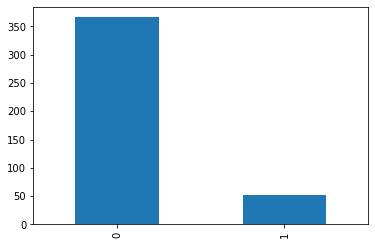

In [32]:
result_func(model,1)

In [33]:
history=model.fit(x,y,epochs=180,batch_size=10,verbose=1)

Epoch 1/180
90/90 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8114
Epoch 2/180
90/90 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8114
Epoch 3/180
90/90 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.8047
Epoch 4/180
90/90 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8070
Epoch 5/180
90/90 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8148
Epoch 6/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8171
Epoch 7/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8126
Epoch 8/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8025
Epoch 9/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8137
Epoch 10/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.8002
Epoch 11/

90/90 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8260
Epoch 84/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8171
Epoch 85/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8227
Epoch 86/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8126
Epoch 87/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8148
Epoch 88/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8159
Epoch 89/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8227
Epoch 90/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8171
Epoch 91/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8260
Epoch 92/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8081
Epoch 93/180


90/90 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8272
Epoch 165/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8361
Epoch 166/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8339
Epoch 167/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8283
Epoch 168/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8350
Epoch 169/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8260
Epoch 170/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8204
Epoch 171/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8294
Epoch 172/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8204
Epoch 173/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8395
Epoc

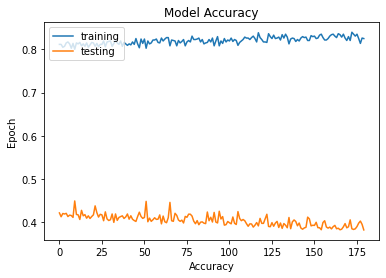

In [34]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

In [35]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [41]:
model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 0s - loss: 0.4841 - accuracy: 0.7837 - val_loss: 0.5745 - val_accuracy: 0.7709 - 245ms/epoch - 3ms/step
Epoch 2/200
72/72 - 0s - loss: 0.4946 - accuracy: 0.7767 - val_loss: 0.4810 - val_accuracy: 0.7765 - 207ms/epoch - 3ms/step
Epoch 3/200
72/72 - 0s - loss: 0.5118 - accuracy: 0.7795 - val_loss: 0.5709 - val_accuracy: 0.7765 - 208ms/epoch - 3ms/step
Epoch 4/200
72/72 - 0s - loss: 0.4789 - accuracy: 0.7893 - val_loss: 0.5688 - val_accuracy: 0.7709 - 198ms/epoch - 3ms/step
Epoch 5/200
72/72 - 0s - loss: 0.4792 - accuracy: 0.7823 - val_loss: 0.5085 - val_accuracy: 0.7542 - 198ms/epoch - 3ms/step
Epoch 6/200
72/72 - 0s - loss: 0.4836 - accuracy: 0.7907 - val_loss: 0.4995 - val_accuracy: 0.7598 - 199ms/epoch - 3ms/step
Epoch 7/200
72/72 - 0s - loss: 0.4729 - accuracy: 0.7935 - val_loss: 0.4682 - val_accuracy: 0.7989 - 193ms/epoch - 3ms/step
Epoch 8/200
72/72 - 0s - loss: 0.4906 - accuracy: 0.7893 - val_loss: 0.5196 - val_accuracy: 0.7598 - 188ms/epoch - 3ms/step
Epoch 9/

Epoch 67/200
72/72 - 0s - loss: 0.4502 - accuracy: 0.8076 - val_loss: 0.4455 - val_accuracy: 0.7933 - 192ms/epoch - 3ms/step
Epoch 68/200
72/72 - 0s - loss: 0.4477 - accuracy: 0.7992 - val_loss: 0.4281 - val_accuracy: 0.8045 - 184ms/epoch - 3ms/step
Epoch 69/200
72/72 - 0s - loss: 0.4476 - accuracy: 0.8104 - val_loss: 0.8887 - val_accuracy: 0.6034 - 186ms/epoch - 3ms/step
Epoch 70/200
72/72 - 0s - loss: 0.4626 - accuracy: 0.7893 - val_loss: 0.4715 - val_accuracy: 0.8045 - 182ms/epoch - 3ms/step
Epoch 71/200
72/72 - 0s - loss: 0.4593 - accuracy: 0.7978 - val_loss: 0.4751 - val_accuracy: 0.7654 - 182ms/epoch - 3ms/step
Epoch 72/200
72/72 - 0s - loss: 0.4748 - accuracy: 0.7921 - val_loss: 0.4304 - val_accuracy: 0.8045 - 192ms/epoch - 3ms/step
Epoch 73/200
72/72 - 0s - loss: 0.4558 - accuracy: 0.7963 - val_loss: 0.5019 - val_accuracy: 0.7821 - 186ms/epoch - 3ms/step
Epoch 74/200
72/72 - 0s - loss: 0.4436 - accuracy: 0.8090 - val_loss: 0.4584 - val_accuracy: 0.7877 - 185ms/epoch - 3ms/step


Epoch 133/200
72/72 - 0s - loss: 0.4376 - accuracy: 0.8062 - val_loss: 0.4282 - val_accuracy: 0.7989 - 227ms/epoch - 3ms/step
Epoch 134/200
72/72 - 0s - loss: 0.4632 - accuracy: 0.8020 - val_loss: 0.6682 - val_accuracy: 0.7654 - 226ms/epoch - 3ms/step
Epoch 135/200
72/72 - 0s - loss: 0.4426 - accuracy: 0.8062 - val_loss: 0.4560 - val_accuracy: 0.7821 - 220ms/epoch - 3ms/step
Epoch 136/200
72/72 - 0s - loss: 0.4336 - accuracy: 0.8118 - val_loss: 0.4152 - val_accuracy: 0.8045 - 213ms/epoch - 3ms/step
Epoch 137/200
72/72 - 0s - loss: 0.4324 - accuracy: 0.8062 - val_loss: 0.4296 - val_accuracy: 0.8045 - 236ms/epoch - 3ms/step
Epoch 138/200
72/72 - 0s - loss: 0.4365 - accuracy: 0.8034 - val_loss: 0.4268 - val_accuracy: 0.7933 - 224ms/epoch - 3ms/step
Epoch 139/200
72/72 - 0s - loss: 0.4341 - accuracy: 0.8090 - val_loss: 0.4268 - val_accuracy: 0.8045 - 228ms/epoch - 3ms/step
Epoch 140/200
72/72 - 0s - loss: 0.4413 - accuracy: 0.8062 - val_loss: 0.4224 - val_accuracy: 0.8045 - 211ms/epoch - 3

72/72 - 0s - loss: 0.4179 - accuracy: 0.8174 - val_loss: 0.4089 - val_accuracy: 0.7989 - 189ms/epoch - 3ms/step
Epoch 199/200
72/72 - 0s - loss: 0.4276 - accuracy: 0.8020 - val_loss: 0.4393 - val_accuracy: 0.7821 - 184ms/epoch - 3ms/step
Epoch 200/200
72/72 - 0s - loss: 0.4220 - accuracy: 0.8146 - val_loss: 0.4241 - val_accuracy: 0.8156 - 191ms/epoch - 3ms/step


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 14)                196       
                                                                 
 dense_6 (Dense)             (None, 9)                 135       
                                                                 
 dense_7 (Dense)             (None, 4)                 40        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


In [43]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8238


In [44]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 82.38%


14/14 [==============================] - 0s 2ms/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.153334,0
892,893,0.295740,0
893,894,0.153334,0
894,895,0.153334,0
895,896,0.589384,1
...,...,...,...
1304,1305,0.153334,0
1305,1306,0.999999,1
1306,1307,0.153334,0
1307,1308,0.153334,0


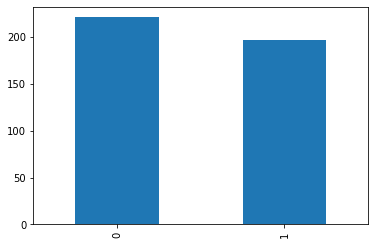

In [45]:
result_func(model,2)

In [48]:
history=model.fit(x,y,validation_split=0.2,epochs=250,batch_size=10,verbose=2)

Epoch 1/250
72/72 - 0s - loss: 0.3971 - accuracy: 0.8329 - val_loss: 0.5014 - val_accuracy: 0.7765 - 243ms/epoch - 3ms/step
Epoch 2/250
72/72 - 0s - loss: 0.3912 - accuracy: 0.8343 - val_loss: 0.4610 - val_accuracy: 0.8101 - 195ms/epoch - 3ms/step
Epoch 3/250
72/72 - 0s - loss: 0.4196 - accuracy: 0.8132 - val_loss: 0.4396 - val_accuracy: 0.8436 - 225ms/epoch - 3ms/step
Epoch 4/250
72/72 - 0s - loss: 0.3983 - accuracy: 0.8272 - val_loss: 0.4924 - val_accuracy: 0.8324 - 183ms/epoch - 3ms/step
Epoch 5/250
72/72 - 0s - loss: 0.3916 - accuracy: 0.8230 - val_loss: 0.4660 - val_accuracy: 0.8212 - 201ms/epoch - 3ms/step
Epoch 6/250
72/72 - 0s - loss: 0.3928 - accuracy: 0.8329 - val_loss: 0.4070 - val_accuracy: 0.8045 - 213ms/epoch - 3ms/step
Epoch 7/250
72/72 - 0s - loss: 0.3929 - accuracy: 0.8343 - val_loss: 0.4341 - val_accuracy: 0.8101 - 191ms/epoch - 3ms/step
Epoch 8/250
72/72 - 0s - loss: 0.3925 - accuracy: 0.8371 - val_loss: 0.4108 - val_accuracy: 0.8492 - 196ms/epoch - 3ms/step
Epoch 9/

Epoch 67/250
72/72 - 0s - loss: 0.4056 - accuracy: 0.8287 - val_loss: 0.3734 - val_accuracy: 0.8547 - 190ms/epoch - 3ms/step
Epoch 68/250
72/72 - 0s - loss: 0.3878 - accuracy: 0.8385 - val_loss: 0.4195 - val_accuracy: 0.8492 - 189ms/epoch - 3ms/step
Epoch 69/250
72/72 - 0s - loss: 0.3990 - accuracy: 0.8371 - val_loss: 0.4114 - val_accuracy: 0.8212 - 187ms/epoch - 3ms/step
Epoch 70/250
72/72 - 0s - loss: 0.3785 - accuracy: 0.8455 - val_loss: 0.3854 - val_accuracy: 0.8268 - 189ms/epoch - 3ms/step
Epoch 71/250
72/72 - 0s - loss: 0.3939 - accuracy: 0.8357 - val_loss: 0.4077 - val_accuracy: 0.8212 - 195ms/epoch - 3ms/step
Epoch 72/250
72/72 - 0s - loss: 0.3934 - accuracy: 0.8413 - val_loss: 0.3864 - val_accuracy: 0.8212 - 189ms/epoch - 3ms/step
Epoch 73/250
72/72 - 0s - loss: 0.3872 - accuracy: 0.8399 - val_loss: 0.3796 - val_accuracy: 0.8380 - 185ms/epoch - 3ms/step
Epoch 74/250
72/72 - 0s - loss: 0.3845 - accuracy: 0.8357 - val_loss: 0.4333 - val_accuracy: 0.8101 - 184ms/epoch - 3ms/step


Epoch 133/250
72/72 - 0s - loss: 0.4133 - accuracy: 0.8216 - val_loss: 0.3738 - val_accuracy: 0.8268 - 190ms/epoch - 3ms/step
Epoch 134/250
72/72 - 0s - loss: 0.3738 - accuracy: 0.8581 - val_loss: 0.4524 - val_accuracy: 0.8380 - 229ms/epoch - 3ms/step
Epoch 135/250
72/72 - 0s - loss: 0.3811 - accuracy: 0.8497 - val_loss: 0.4583 - val_accuracy: 0.8212 - 186ms/epoch - 3ms/step
Epoch 136/250
72/72 - 0s - loss: 0.3698 - accuracy: 0.8469 - val_loss: 0.4055 - val_accuracy: 0.8156 - 191ms/epoch - 3ms/step
Epoch 137/250
72/72 - 0s - loss: 0.3725 - accuracy: 0.8497 - val_loss: 0.3936 - val_accuracy: 0.8324 - 193ms/epoch - 3ms/step
Epoch 138/250
72/72 - 0s - loss: 0.3825 - accuracy: 0.8441 - val_loss: 0.4282 - val_accuracy: 0.8045 - 186ms/epoch - 3ms/step
Epoch 139/250
72/72 - 0s - loss: 0.3850 - accuracy: 0.8371 - val_loss: 0.3951 - val_accuracy: 0.8156 - 186ms/epoch - 3ms/step
Epoch 140/250
72/72 - 0s - loss: 0.3765 - accuracy: 0.8413 - val_loss: 0.6608 - val_accuracy: 0.7821 - 181ms/epoch - 3

72/72 - 0s - loss: 0.3812 - accuracy: 0.8455 - val_loss: 0.3852 - val_accuracy: 0.8436 - 186ms/epoch - 3ms/step
Epoch 199/250
72/72 - 0s - loss: 0.3725 - accuracy: 0.8497 - val_loss: 0.4521 - val_accuracy: 0.8101 - 190ms/epoch - 3ms/step
Epoch 200/250
72/72 - 0s - loss: 0.3915 - accuracy: 0.8413 - val_loss: 0.3840 - val_accuracy: 0.8380 - 186ms/epoch - 3ms/step
Epoch 201/250
72/72 - 0s - loss: 0.3852 - accuracy: 0.8427 - val_loss: 0.4110 - val_accuracy: 0.8101 - 185ms/epoch - 3ms/step
Epoch 202/250
72/72 - 0s - loss: 0.3765 - accuracy: 0.8385 - val_loss: 0.3593 - val_accuracy: 0.8436 - 186ms/epoch - 3ms/step
Epoch 203/250
72/72 - 0s - loss: 0.3924 - accuracy: 0.8441 - val_loss: 0.3851 - val_accuracy: 0.8380 - 185ms/epoch - 3ms/step
Epoch 204/250
72/72 - 0s - loss: 0.3704 - accuracy: 0.8511 - val_loss: 0.3684 - val_accuracy: 0.8380 - 191ms/epoch - 3ms/step
Epoch 205/250
72/72 - 0s - loss: 0.3717 - accuracy: 0.8483 - val_loss: 0.3971 - val_accuracy: 0.8212 - 187ms/epoch - 3ms/step
Epoch 

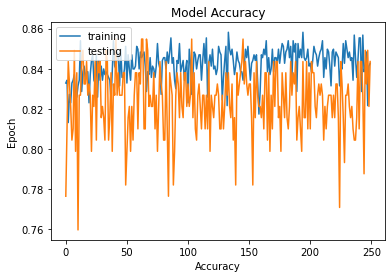

In [49]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")